Enter initial guess: 0
Iteration: 0  x: 1.0  Error: 1.0
Iteration: 1  x: 0.36787944117144233  Error: 0.6321205588285577
Iteration: 2  x: 0.8734230184931167  Error: 0.5055435773216743
Iteration: 3  x: 0.46632718884976154  Error: 0.4070958296433551
Iteration: 4  x: 0.8045589442453068  Error: 0.3382317553955453
Iteration: 5  x: 0.5234493035249297  Error: 0.28110964072037714
Iteration: 6  x: 0.7603327037814904  Error: 0.23688340025656074
Iteration: 7  x: 0.5609599196759166  Error: 0.1993727841055738
Iteration: 8  x: 0.7300253411903657  Error: 0.16906542151444903
Iteration: 9  x: 0.5868787737589396  Error: 0.14314656743142606
Iteration: 10  x: 0.7086264960853117  Error: 0.1217477223263721
Iteration: 11  x: 0.6052271051630286  Error: 0.10339939092228312
Iteration: 12  x: 0.6932948863834245  Error: 0.08806778122039594
Iteration: 13  x: 0.6183764902539214  Error: 0.07491839612950313
Iteration: 14  x: 0.6822292842673777  Error: 0.06385279401345634
Iteration: 15  x: 0.6278607980048144  Error: 0.

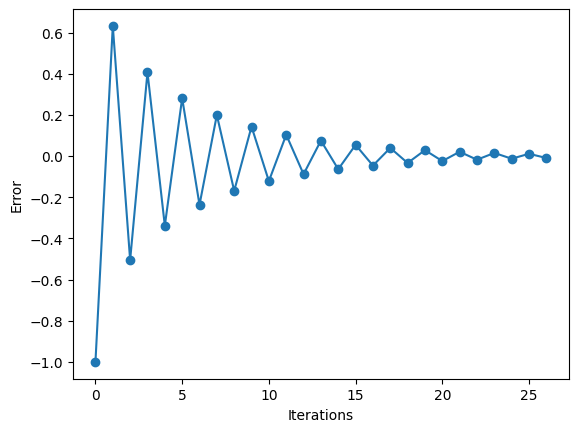

In [2]:
# relaxation method 
import numpy as np
import matplotlib.pyplot as plt

x = float(input("Enter initial guess: "))
err = []

for n in range(50):
    x0 = x
    x = np.exp(-x * x)
    err.append(x0 - x)
    print("Iteration:", n, " x:", x, " Error:", abs(err[-1]))

    if abs(err[-1]) < 0.01:
        break

print("The solution is:", x)

plt.plot(range(n + 1), err, "-o")
plt.ylabel("Error")
plt.xlabel("Iterations")
plt.show()


Enter initial guess: 0
Iteration: 0  x: 1.0  Error: 1.0
Iteration: 1  x: 1.6321205588285577  Error: 0.6321205588285577
Iteration: 2  x: 1.9303182978440407  Error: 0.2981977390154831
Iteration: 3  x: 1.9759141014222634  Error: 0.04559580357822268
Iteration: 4  x: 1.9798436627477034  Error: 0.003929561325439979
The solution is: 1.9798436627477034


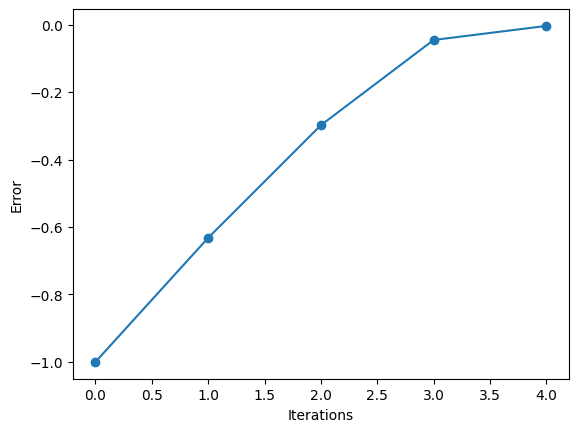

In [11]:
# relaxation method 
import numpy as np
import matplotlib.pyplot as plt

x = float(input("Enter initial guess: "))
err = []

for n in range(50):
    x0 = x
    x = 2-np.exp(-x * x)
    err.append(x0 - x)
    print("Iteration:", n, " x:", x, " Error:", abs(err[-1]))

    if abs(err[-1]) < 0.01:
        break

print("The solution is:", x)

plt.plot(range(n + 1), err, "-o")
plt.ylabel("Error")
plt.xlabel("Iterations")
plt.show()


In [4]:
# Bisection part
def f(x):
    return x**3 - 15*x - 4

# Bisection part
def bisect(x1, x2):
    if f(x1) * f(x2) >= 0:
        print("Not a good choice of the interval")
        return

    # Loop starts and will run for 500 steps
    for i in range(500):
        xm = (x1 + x2) / 2

        if abs(x2 - x1) <= 0.001:
            # The middle point can be a root (by fortune!)
            if f(xm) == 0.0:
                break

        # Find whether root left / right of the midpoint
        if f(x1) * f(xm) < 0.0:
            x2 = xm
        else:
            x1 = xm

    print("Root at:", xm)
    print("Value of the function:", f(xm))

# Main code
x1 = float(input("Enter the value of x1:"))
x2 = float(input("Enter the value of x2:"))
bisect(x1, x2)


Enter the value of x1:0
Enter the value of x2:5
Root at: 4.0
Value of the function: 0.0


Enter the value of x1:0
Root at: -0.2679491924311227 Converged in: 3 steps
Value of the function: 0.0


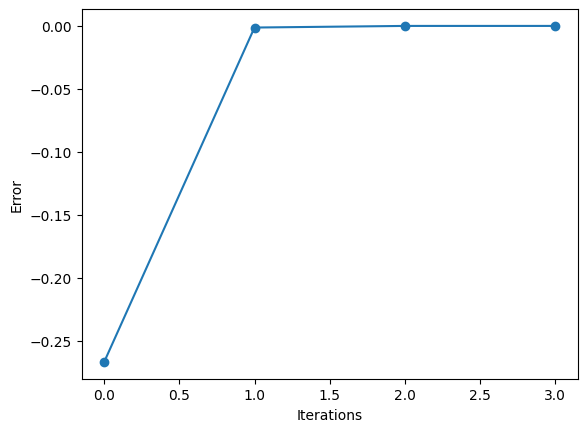

In [8]:
# Newton-raphson method 
import matplotlib.pyplot as plt

# Define the function and first derivative
def f(x):
    return x**3 - 15*x - 4

def df(x):
    return 3*x**2 - 15

def newton(x1):
    err = []

    for i in range(500):
        x2 = x1 - f(x1) / df(x1)
        err.append(x2 - x1)

        if abs(x2 - x1) < 0.00000000001:
            root = x2
            print("Root at:", x2, "Converged in:", i, "steps")
            print("Value of the function:", f(x2))
            break

        x1 = x2

    plt.plot(range(i + 1), err, "-o")
    plt.xlabel("Iterations")
    plt.ylabel("Error")
    plt.show()

# Main code
x1 = float(input("Enter the value of x1:"))
newton(x1)



In [10]:
# Newton-raphson method 
def f(x):
    return x**3 - 15*x - 4

def f_prime(x):
    return 3*x**2 - 15

def newton_raphson(initial_guess, tol=1e-6, max_iter=100):
    x = initial_guess
    for i in range(max_iter):
        x_next = x - f(x) / f_prime(x)
        if abs(x_next - x) < tol:
            return x_next
        x = x_next
    return None  # Return None if the method did not converge

# Initial guess
x0 = 0

# Find the first root
root1 = newton_raphson(x0)
print(f"Root 1: {root1}")

# Find the other roots using the previous root as a new initial guess
x0 = 2  # Change the initial guess for the second root
root2 = newton_raphson(x0)
print(f"Root 2: {root2}")

x0 = -2  # Change the initial guess for the third root
root3 = newton_raphson(x0)
print(f"Root 3: {root3}")


Root 1: -0.26794919243112225
Root 2: -3.7320508075689007
Root 3: 4.0


In [9]:
#Jacobi
N = 50
x0 = -2
x1 = 2
x2 = 3

for n in range(1, N):
    y0 = x0
    y1 = x1
    y2 = x2

    x0 = (8.0 - 2.0 * y1 - 3.0 * y2) / 4.0
    x1 = (-14.0 - 3.0 * y0 - 2.0 * y2) / (-5)
    x2 = (27.0 + 2.0 * y0 - 3.0 * y1) / 8.0

    er = (abs(x0 - y0) + abs(x1 - y1) + abs(x2 - y2)) / 3.0

    print(n, x0, x1, x2)

    if er < 0.0001:
        break

print("Convergence achieved in", n, "steps")
print(x0, x1, x2)


1 -1.25 2.8 2.125
2 -0.9937499999999999 2.9 2.0125
3 -0.9593750000000001 3.00875 2.0390625
4 -1.033671875 3.04 2.006875
5 -1.02515625 2.9825468749999997 1.97658203125
6 -0.9737099609374997 2.9755390625 2.000255859375
7 -0.9879614257812501 3.0158763671875 2.015745361328125
8 -1.0197472045898437 3.0135212890625 1.997056005859375
9 -1.0045526489257812 2.9869740795898436 1.9899927154541013
10 -0.9859815763854978 2.993265496826172 2.0037465579223634
11 -0.9994426668548584 3.009909677337647 2.0060300445938113
12 -1.0094773721141819 3.0027464177246097 1.996423204284668
13 -0.9986906120758059 2.9928828584453577 1.9966007503247258
14 -0.9938919919662232 2.9994259328844066 2.0029962750640395
15 -1.001960172740233 3.004863314845882 2.001742277176792
16 -1.003738365305535 2.9995208072265767 1.9976862137477358
17 -0.9980250639240902 2.9968314663157734 1.99924510596365
18 -0.9978495626306241 3.0008830040310057 2.0016819341505627
19 -1.001702952628425 3.0019630360818508 2.000206482830717
20 -1.001136

In [12]:
#Gauss-Siedel
N = 50
x0 = -2
x1 = 2
x2 = 3

for n in range(1, N):
    y0 = x0
    y1 = x1
    y2 = x2

    x0 = (8.0 - 2.0 * x1 - 3.0 * x2) / 4.0
    x1 = (-14.0 - 3.0 * x0 - 2.0 * x2) / (-5)
    x2 = (27.0 + 2.0 * x0 - 3.0 * x1) / 8.0

    er = (abs(x0 - y0) + abs(x1 - y1) + abs(x2 - y2)) / 3.0

    print(n, x0, x1, x2)

    if er < 0.0001:
        break

print("Convergence achieved in", n, "steps")
print(x0, x1, x2)


1 -1.25 3.25 1.84375
2 -1.0078125 2.9328125 2.0232421875
3 -0.983837890625 3.018994140625 1.996917724609375
4 -1.0071853637695312 2.9944558715820313 2.0002827072143554
5 -0.9974399662017823 3.001649103164673 2.0000215947628024
6 -1.000840747654438 2.999504189312458 1.9999757420942186
7 -0.9997339012268931 3.000149956101551 2.000010291155195
8 -1.0000826964171718 2.9999544986117748 1.9999963889162915
9 -0.999974540993106 3.000013830970653 2.0000011781377287
Convergence achieved in 9 steps
-0.999974540993106 3.000013830970653 2.0000011781377287


In [20]:
# jacobi method
import numpy as np
import sys

# System size
n = int(input('Number of unknowns? '))

# Initializing matrix and vector
a = np.zeros([n, n], float)
b = np.zeros(n, float)
x = np.zeros(n, float)
d = np.zeros((n, n), float)
p = np.zeros((n, n), float)
q = np.zeros(n, float)

print('Enter the coefficient matrix row by row')
for i in range(n):
    row_values = input('Enter values for row {}: '.format(i + 1)).split(',')
    for j in range(n):
        a[i, j] = float(row_values[j])

# Constructing the diagonal matrix
for i in range(n):
    if a[i, i] == 0.0:
        sys.exit('Error: division by zero!!')
    else:
        d[i, i] = 1.0 / a[i, i]
        a[i, i] = 0.0

# Constructing the p matrix
p = -d.dot(a)
print("The p matrix is")
print(p)

# Constructing the q matrix
print("Enter the b vector")
for i in range(n):
    b[i] = float(input('Enter value for b[{}]: '.format(i)))

q = d.dot(b)
print("The q matrix is")
print(q)

# Enter the initial guess
print("Enter the initial guess")
for i in range(n):
    x[i] = float(input('Enter value for x[{}]: '.format(i)))

# Jacobi iteration starts
for i in range(50):
    x_new = p.dot(x) + q
    er = np.linalg.norm(x_new - x, np.inf)

    if er < 0.001:
        print("Converged in", i, "steps")
        print(x_new)
        sys.exit("Well done!")

    x = x_new

print("Did not converge in 50 steps.")


Number of unknowns? 3
Enter the coefficient matrix row by row
Enter values for row 1: 1.0, 0.5, 0.75
Enter values for row 2: -0.6, 1.0, -0.4
Enter values for row 3: -0.25, 0.375, 1.0
The p matrix is
[[-0.    -0.5   -0.75 ]
 [ 0.6   -0.     0.4  ]
 [ 0.25  -0.375 -0.   ]]
Enter the b vector
Enter value for b[0]: 2
Enter value for b[1]: 2.8
Enter value for b[2]: 3.375
The q matrix is
[2.    2.8   3.375]
Enter the initial guess
Enter value for x[0]: 2
Enter value for x[1]: 2
Enter value for x[2]: 3
Converged in 41 steps
[-0.9999041   3.00051996  2.00035272]


SystemExit: Well done!

In [21]:
# interpolation
import numpy as np

def interpolation(x1, x2, y1, y2, x):
    fx = y1 + (x - x1) * (y2 - y1) / (x2 - x1)
    return fx

# Driving program (assuming a function y = x ** 0.5)
x1 = float(input("Enter the value of x1: "))
y1 = np.sqrt(x1)
x2 = float(input("Enter the value of x2: "))
y2 = np.sqrt(x2)
x = (x1 + x2) / 2

nans = interpolation(x1, x2, y1, y2, x)
ans = np.sqrt(x)
err = abs(nans - ans)

print("Interpolated value at x =", x)
print(nans)
print("Absolute value of deviation from the actual value:", err)


Enter the value of x1: 1
Enter the value of x2: 2
Interpolated value at x = 1.5
1.2071067811865475
Absolute value of deviation from the actual value: 0.01763809020504148


In [22]:
# Trapezoidal method 
def f(x):
    return 5 * x**4 + 4 * x**3 + 3 * x**2 + 2 * x + 1

N = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
a = 1.0
b = 2.0

for i in range(10):
    h = (b - a) / N[i]
    s = 0.5 * f(a) + 0.5 * f(b)

    for k in range(1, N[i]):
        s += f(a + k * h)

    print("Interval width", h, "Value", h * s)


Interval width 0.5 Value 60.78125
Interval width 0.25 Value 57.947265625
Interval width 0.125 Value 57.2369384765625
Interval width 0.0625 Value 57.059242248535156
Interval width 0.03125 Value 57.01481103897095
Interval width 0.015625 Value 57.00370278954506
Interval width 0.0078125 Value 57.00092569924891
Interval width 0.00390625 Value 57.00023142492864
Interval width 0.001953125 Value 57.00005785623944
Interval width 0.0009765625 Value 57.00001446406044


In [23]:
def rectangle_method(f, a, b, N):
    h = (b - a) / N
    s = 0.0

    for k in range(N):
        x_k = a + (k + 0.5) * h
        s += f(x_k)

    result = h * s
    return result

# Example usage for your function f(x)
a = 1.0
b = 2.0
N_values = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

for N in N_values:
    result = rectangle_method(f, a, b, N)
    print("Interval width", (b - a) / N, "Value", result)


Interval width 0.5 Value 55.11328125
Interval width 0.25 Value 56.526611328125
Interval width 0.125 Value 56.88154602050781
Interval width 0.0625 Value 56.97037982940674
Interval width 0.03125 Value 56.99259454011917
Interval width 0.015625 Value 56.99814860895276
Interval width 0.0078125 Value 56.999537150608376
Interval width 0.00390625 Value 56.99988428755023
Interval width 0.001953125 Value 56.99997107188076
Interval width 0.0009765625 Value 56.99999276796998


For h = 0.01, at point 1, Error: 3.3333333331997395e-05
For h = 0.01, at point 2, Error: 3.333333333455091e-05
For h = 0.01, at point 3, Error: 3.3333333334439885e-05
For h = 0.01, at point 4, Error: 3.333333333466193e-05
For h = 0.01, at point 5, Error: 3.333333333221944e-05
For h = 0.01, at point 6, Error: 3.333333333277455e-05
For h = 0.01, at point 7, Error: 3.333333333355171e-05
For h = 0.01, at point 8, Error: 3.333333333455091e-05
For h = 0.01, at point 9, Error: 3.333333333133126e-05
For h = 0.01, at point 10, Error: 3.333333333266353e-05
For h = 0.01, at point 11, Error: 3.333333333421784e-05
For h = 0.01, at point 12, Error: 3.333333333466193e-05
For h = 0.01, at point 13, Error: 3.333333333233046e-05
For h = 0.01, at point 14, Error: 3.333333333321864e-05
For h = 0.01, at point 15, Error: 3.333333333421784e-05
For h = 0.01, at point 16, Error: 3.3333333332552506e-05
For h = 0.01, at point 17, Error: 3.3333333333884774e-05
For h = 0.01, at point 18, Error: 3.333333333277455e-

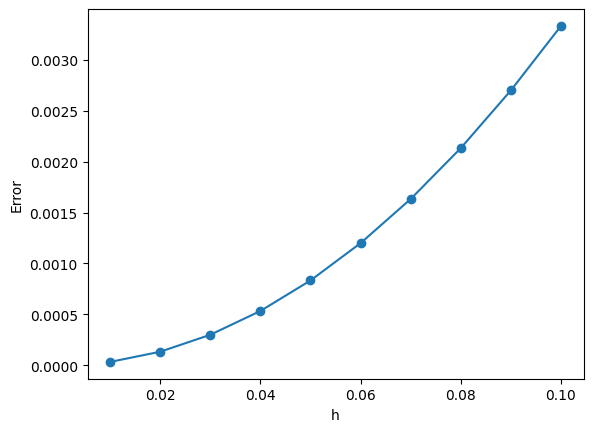

In [29]:
import numpy as np
import matplotlib.pyplot as plt

llim = -1.0

def f(x):
    return x**3 / 3.0

h = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
maxerr = []

for j in range(10):
    n = int(2.0 / h[j])
    err = []

    for i in range(1, n + 1):
        xl = llim + (i - 1) * h[j]
        xm = xl + h[j]
        xr = xm + h[j]
        df = (f(xr) - f(xl)) / (xr - xl)
        err_at_point = abs(df - xm * xm)
        err.append(err_at_point)
        print(f"For h = {h[j]}, at point {i}, Error: {err_at_point}")

    max_err_for_h = max(err)
    maxerr.append(max_err_for_h)
    print(f"For h = {h[j]}, Maximum Error: {max_err_for_h}")
    print("----------------------")

plt.xlabel("h")
plt.ylabel("Error")
plt.plot(h, maxerr, "-o")
plt.show()


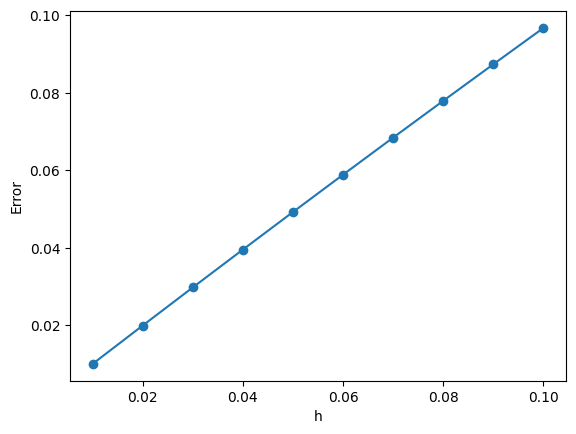

In [27]:
# forward difference 
import numpy as np
import matplotlib.pyplot as plt

llim = -1.0

def f(x):
    return x**3 / 3.0

h = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
maxerr = []

for j in range(10):
    err = []
    n = int(2.0 / h[j])

    for i in range(1, n + 1):
        xl = llim + (i - 1) * h[j]
        xr = xl + h[j]
        df = (f(xr) - f(xl)) / (xr - xl)
        err.append(abs(df - xl * xl))

    maxerr.append(max(err))

plt.xlabel("h")
plt.ylabel("Error")
plt.plot(h, maxerr, "-o")
plt.show()


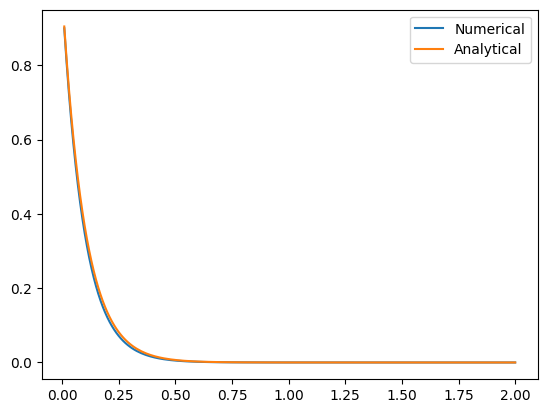

In [31]:
# Explicit method
import numpy as np
import matplotlib.pyplot as plt

a = 10.0

# Analytical solution
def f(x, t):
    return -a * x

# ODE solver
def euler_expl(x0, t0, t1):
    return x0 + f(x0, t0) * (t1 - t0)

# Main program
x0 = x1 = 1
t0 = t1 = 0
dt = 0.01
N = int(2 / dt)
numerical = np.zeros(N, float)

for i in range(N):
    x0 = x1
    t0 = t1
    t1 = t0 + dt
    x1 = euler_expl(x0, t0, t1)
    numerical[i] = x1

x_analytical = np.exp(-a * np.linspace(dt, N * dt, N))  # Analytical solution

plt.plot(np.linspace(dt, N * dt, N), numerical, label='Numerical')
plt.plot(np.linspace(dt, N * dt, N), x_analytical, label='Analytical')
plt.legend()
plt.show()


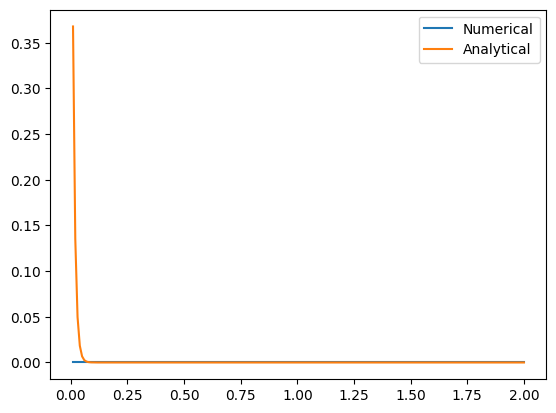

In [33]:
# Explicit method
import numpy as np
import matplotlib.pyplot as plt

a = 100.0

# Analytical solution
def f(x, t):
    return -a * x

# ODE solver
def euler_expl(x0, t0, t1):
    return x0 + f(x0, t0) * (t1 - t0)

# Main program
x0 = x1 = 1
t0 = t1 = 0
dt = 0.01
N = int(2 / dt)
numerical = np.zeros(N, float)

for i in range(N):
    x0 = x1
    t0 = t1
    t1 = t0 + dt
    x1 = euler_expl(x0, t0, t1)
    numerical[i] = x1

x_analytical = np.exp(-a * np.linspace(dt, N * dt, N))  # Analytical solution

plt.plot(np.linspace(dt, N * dt, N), numerical, label='Numerical')
plt.plot(np.linspace(dt, N * dt, N), x_analytical, label='Analytical')
plt.legend()
plt.show()


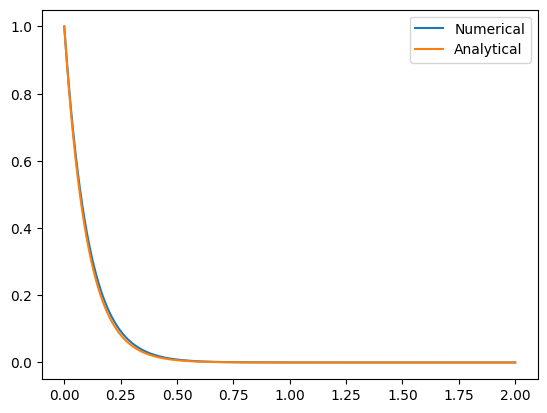

In [32]:
# Impliocit method 
import numpy as np
import matplotlib.pyplot as plt

a = -10

# Main program
dt = 0.01
N = int(2 / dt)
numerical = np.zeros(N, float)

for i in range(N):
    if i == 0:
        numerical[i] = 1.0  # Initial condition
    else:
        numerical[i] = numerical[i - 1] / (1 - a * dt)

x_analytical = np.exp(a * np.linspace(0, N * dt, N))  # Analytical solution

plt.plot(np.linspace(0, N * dt, N), numerical, label='Numerical')
plt.plot(np.linspace(0, N * dt, N), x_analytical, label='Analytical')
plt.legend()
plt.show()


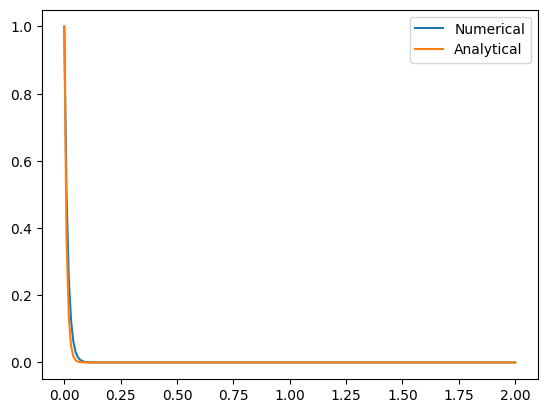

In [34]:
# Impliocit method 
import numpy as np
import matplotlib.pyplot as plt

a = -100

# Main program
dt = 0.01
N = int(2 / dt)
numerical = np.zeros(N, float)

for i in range(N):
    if i == 0:
        numerical[i] = 1.0  # Initial condition
    else:
        numerical[i] = numerical[i - 1] / (1 - a * dt)

x_analytical = np.exp(a * np.linspace(0, N * dt, N))  # Analytical solution

plt.plot(np.linspace(0, N * dt, N), numerical, label='Numerical')
plt.plot(np.linspace(0, N * dt, N), x_analytical, label='Analytical')
plt.legend()
plt.show()


Enter the value of time: 0.4


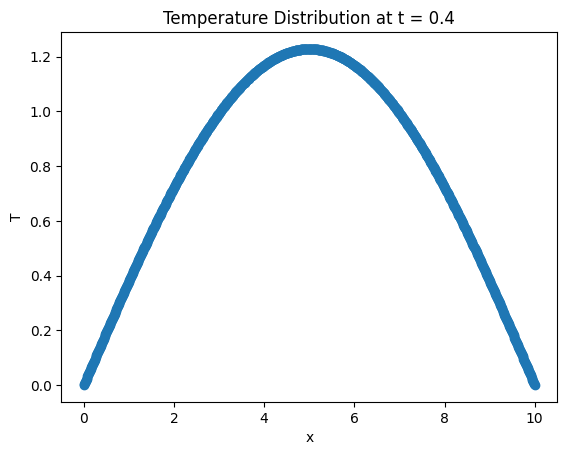

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, t):
    s = 0.0
    for n in range(1, 1000, 2):
        s += np.exp(-n**2 * np.pi**2 * t) * np.sin(n * np.pi * x / 10) / n
    return 200 * s / np.pi

x = np.linspace(0, 10, 1000)
t = float(input("Enter the value of time: "))
Temp = f(x, t)

plt.plot(x, Temp, "-o")
plt.xlabel('x')
plt.ylabel('T')
plt.title('Temperature Distribution at t = {}'.format(t))
plt.show()


Temperature at x=0.0: 0.0
Temperature at x=0.1: 0.021724518092764943
Temperature at x=0.2: 0.043427161329553154
Temperature at x=0.30000000000000004: 0.06508607731114313
Temperature at x=0.4: 0.08667945680842773
Temperature at x=0.5: 0.10818555786694373
Temperature at x=0.6000000000000001: 0.12958272470899754
Temperature at x=0.7000000000000001: 0.15084941336303165
Temperature at x=0.8: 0.17196420871448642
Temperature at x=0.9: 0.19290585151066192
Temperature at x=1.0: 0.21365325354767262
Temperature at x=1.1: 0.23418552587640298
Temperature at x=1.2000000000000002: 0.25448199213944905
Temperature at x=1.3: 0.2745222177804637
Temperature at x=1.4000000000000001: 0.2942860215702541
Temperature at x=1.5: 0.31375350560065957
Temperature at x=1.6: 0.33290506506259565
Temperature at x=1.7000000000000002: 0.3517214187869667
Temperature at x=1.8: 0.37018361735905825
Temperature at x=1.9000000000000001: 0.38827307395317917
Temperature at x=2.0: 0.40597157088708424
Temperature at x=2.1: 0.42326

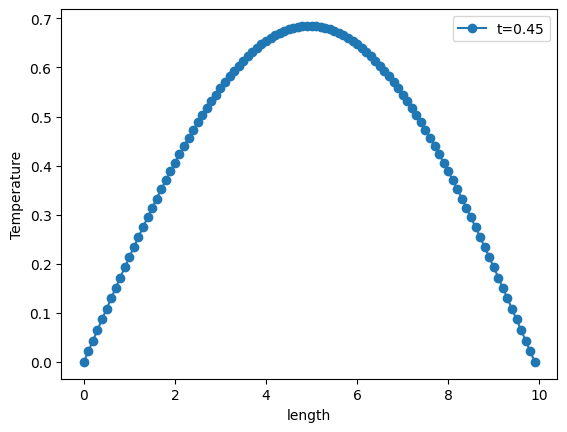

In [42]:
import numpy as np
import matplotlib.pyplot as plt

m, n = 100, 10000
h, k, alpha2 = 0.1, 0.00005, 100
r = alpha2 * k / (h * h)

f = np.zeros([m, n], float)

# Initial condition
for i in range(m):
    f[i, 0] = 50.0

# Boundary condition
f[0, :] = 0.0
f[m-1, :] = 0.0

for j in range(n-1):
    for i in range(1, m-1):
        f[i, j+1] = (1.0 - 2.0 * r) * f[i, j] + r * (f[i+1, j] + f[i-1, j])

x = [i * h for i in range(m)]
y = f[:, 9000]

# Print values at each point
for i in range(m):
    print(f'Temperature at x={x[i]}: {y[i]}')

plt.xlabel('length')
plt.ylabel('Temperature')
plt.plot(x, y, "-o", label="t=" + str(9000 * k))
plt.legend()
plt.show()


Enter initial guess: 1
Iteration: 0  x: 1.3862943611198906  Error: 0.3862943611198906
Iteration: 1  x: 1.5936767666954854  Error: 0.20738240557559484
Iteration: 2  x: 1.7119594165164869  Error: 0.11828264982100145
Iteration: 3  x: 1.7801599616030446  Error: 0.0682005450865577
Iteration: 4  x: 1.8195318043398538  Error: 0.03937184273680927
Iteration: 5  x: 1.8422459695204298  Error: 0.022714165180576007
Iteration: 6  x: 1.8553397520603914  Error: 0.013093782539961518
Iteration: 7  x: 1.8628833832972396  Error: 0.007543631236848203
The solution is: 1.8628833832972396


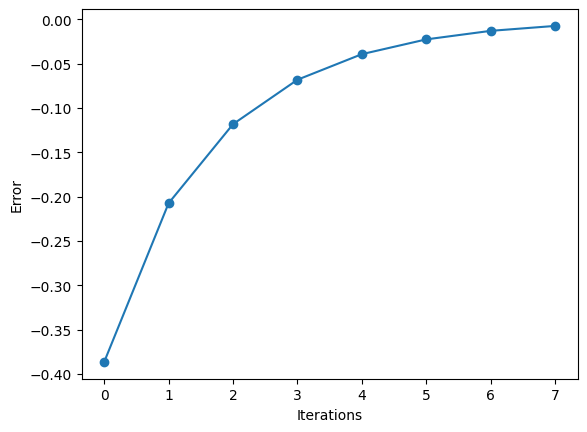

In [47]:
# relaxation method 
import numpy as np
import math 
import matplotlib.pyplot as plt

x = float(input("Enter initial guess: "))
err = []

for n in range(50):
    x0 = x
    x = math.log(x**2 +3)
    err.append(x0 - x)
    print("Iteration:", n, " x:", x, " Error:", abs(err[-1]))

    if abs(err[-1]) < 0.01:
        break

print("The solution is:", x)

plt.plot(range(n + 1), err, "-o")
plt.ylabel("Error")
plt.xlabel("Iterations")
plt.show()


In [45]:
import matplotlib.pyplot as plt
m,n= 10, 240
h,k,alpha2= 0.1, 0.000025, 100
r= alpha2*k/(h*h)
f=np.zeros([m,n], float)
#initial condition
for i in range (m):
  f[i,0]=np.sin(i*(np.pi))/5

#Boundry condition
f[0,0]=0.0
f[m-1,0]=0.0
for j in range(n-1):
  for i in range(1,m-1):
    f[i,j+1]=(1.0-2.0*r)f[i,j]+r(f[i+1,j]+f[i-1,j])
    
x,y=[],[]
for i in range(m):
  x.append(i*h)
  y.append(f[i,210])
plt.xlabel('length')
plt.ylabel('Temperature')
plt.plot(x,y,"-o",label="t=" + str(210+k))

SyntaxError: invalid syntax (243846736.py, line 15)